In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 13449.9902 - mae: 13449.9902 - val_loss: 12393.6699 - val_mae: 12393.6699
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13386.3477 - mae: 13386.3477 - val_loss: 12309.7119 - val_mae: 12309.7119
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13261.4629 - mae: 13261.4629 - val_loss: 12133.7393 - val_mae: 12133.7393
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13009.8545 - mae: 13009.8545 - val_loss: 11795.0605 - val_mae: 11795.0605
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12553.0879 - mae: 12553.0879 - val_loss: 11214.2412 - val_mae: 11214.2412
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11813.9150 - mae: 11813.9150 - val_loss: 10320.6543 - val_mae: 10320.6543
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 10774.9561 - mae: 10774.9561 - val_loss: 9192

[5157.99365234375, 5157.99365234375]

9/9 [==============================] - 0s 1ms/step - loss: 2183.4258 - mae: 2183.4258


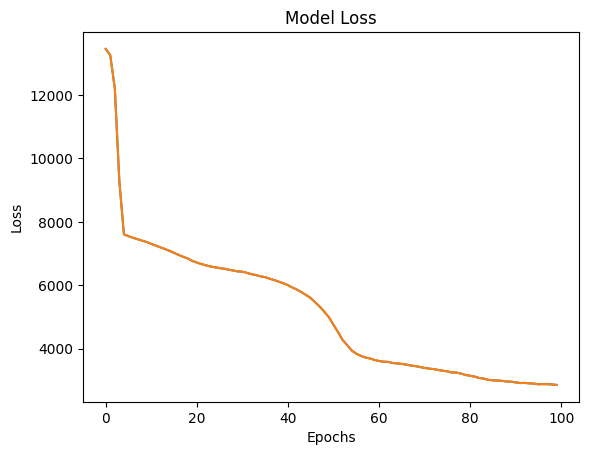

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

9/9 [==============================] - 0s 2ms/step - loss: 1348.8405 - mae: 1348.8405


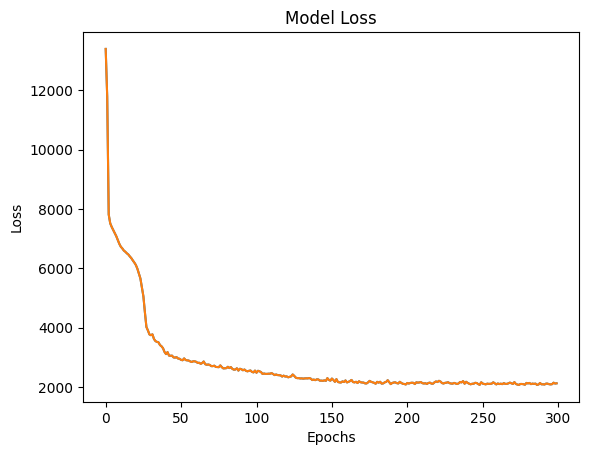

9/9 [==============================] - 0s 1ms/step - loss: 1348.8405 - mae: 1348.8405


(1348.8404541015625, 1348.8404541015625)

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=300, verbose=0)
model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

model_loss, model_mae = model.evaluate(X_test, y_test)
model_loss, model_mae

9/9 [==============================] - 0s 2ms/step - loss: 1313.3007 - mae: 1313.3007


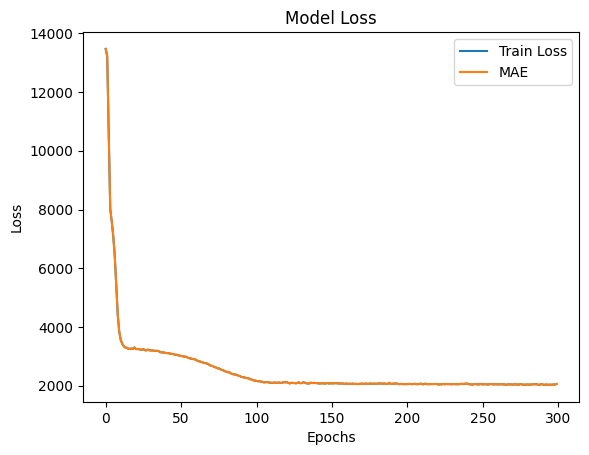


              model          mae
0            model  1348.840454
1  insurance_model  1313.300659


In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = data.drop("charges", axis=1)
y = data["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

insurance_model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_normal.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_history = insurance_model.fit(X_train_normal, y_train, epochs=300, verbose=0) 

insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test_normal, y_test)

plt.plot(insurance_history.history['loss'], label='Train Loss')
plt.plot(insurance_history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

model_results = [["model", model_mae],
                 ["insurance_model", insurance_model_mae]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
print("\n", all_results)